# A1Q3 cmpt423
Hongyi Xue 
hox294 
11187674

a) Plot the density of each of the observable features.

In [1]:
import numpy.random as nprand
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

irisdata = pd.DataFrame(X)
irisdata.plot.density()
plt.show()

<Figure size 640x480 with 1 Axes>

b) Plot the density of each of the observable features conditional on the class variable. In other words, separate the data into 3 subsets, one for each class, and plot the densities again for each subset.

classes
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

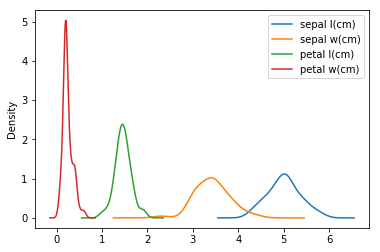

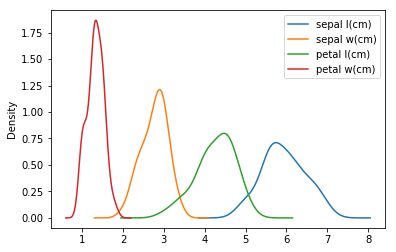

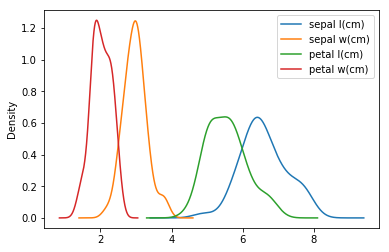

In [2]:
#seperate the data
data = {'sepal l(cm)': iris['data'][:,0],
       'sepal w(cm)': iris['data'][:,1],
       'petal l(cm)': iris['data'][:,2],
       'petal w(cm)': iris['data'][:,3],
       'classes': iris['target']}

df = pd.DataFrame(data)
df['classes'] = df['classes'].astype("category")

#seperate 3 classes
df['classes'].cat.categories = ['setosa', 'versicolor', 'virginica']
#plot it
df.groupby('classes').plot(kind='density')

Comment: From the density plot, we know that what value range appear the most on each coloums 0~3: column 0 range from 4 to 8; column 1 has high density in value = 1.0; colum 2 range from 0 to 2 and 4 to 6 roughly; column 3 has high density at value = 0.42, 0.2, 0.5.  If the curve is very steep, then it means that the density is very high in that value; if the curve is gently, then it means the data are spread in that region of values.

Comment: From these three density plot, we can tell that different speice of flowers has different features interms of different sepal length and width, different petal length and width. For example, "Setosa", shown the first plot, most of Setosa flower has petal width very close to 5cm; petal length quite close to 2.5 cm; sepal width can vary from 3 to 4cm; sepal length can vary from 4.5 to 5.5cm.

c) Using a Gaussian Naive Bayes model, fit the model to the data, and produce a classifier. Calculate the accuracy.

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#print(data)
clf = GaussianNB()
y = iris.target
clf.fit(X, y) #classifier

pred = clf.predict(X)
print("Data size:", X.shape[0])
print("Accuracy", accuracy_score(y, pred))


Data size: 150
Accuracy 0.96


Comment: We can see that the accuracy is very high 96%. Based on the strong Naive Bayes assumption, the more independent features values are the more accurate the prediction will be. From the conditional densities I plotted earlier, we can tell that the four feature values are quite independent, which allow the model to give a good prediction for a 96% accuracy rate. 

d) Choose one of the features and add N(0,σ2) noise to it, varying σ2 from 0.1 to 5.0. For each value of σ2, fit a Gaussian Naive Bayes model, estimate the accuracy, and plot the results vs σ2.

Original Accuracy 0.96
sigma = 0.0 Accuracy 0.96
sigma = 0.5 Accuracy 0.9733333333333334
sigma = 1.0 Accuracy 0.96
sigma = 1.5 Accuracy 0.96
sigma = 2.0 Accuracy 0.9666666666666667
sigma = 2.5 Accuracy 0.9666666666666667
sigma = 3.0 Accuracy 0.96
sigma = 3.5 Accuracy 0.96
sigma = 4.0 Accuracy 0.9666666666666667
sigma = 4.5 Accuracy 0.96
sigma = 5.0 Accuracy 0.96


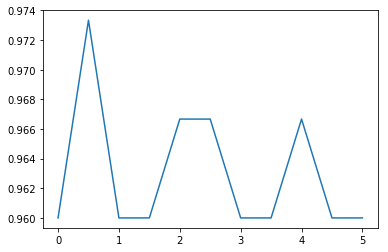

In [4]:
print("Original Accuracy", accuracy_score(y, pred))

sig_list = [] #sigma values
accu_list = [] #accuracy values
mu = 0
for sigma in range(0, 51, 5):
    new_X = X
    noise = np.random.normal(mu, sigma/10, len(X)) #create noise
    for num in range(0, len(X)):
        new_X[num, 0] = X[num, 0] + noise[num] #add the noise
    
    clf = GaussianNB()
    y = iris.target
    clf.fit(X, y)
    pred = clf.predict(X) #train the noise value
    print("sigma =", sigma/10, "Accuracy", accuracy_score(y, pred)) #see the accuracy
    sig_list.append(sigma/10)
    accu_list.append(accuracy_score(y, pred))
    
plt.plot(sig_list, accu_list)


Comment: We can see that the accuracy does not change much as sigma keep increasing, which was sort of surprising. I think the reason is that we are only adding noise to one of the feature values. The model can look at other feature values to predict the goal value. If other feature values are distinct enough(which they are in this case), the model will still be able to make good prediction.